# 4_Prediction Models

In machine learning, there’s something called the “No Free Lunch” theorem which means no one algorithm works well for every problem. This is widely applicable in Prediction Models where we train our dataset on an algorithm and later use the trained model for predictions on new data.

Machine learning is part art and part science. When you look at machine learning algorithms, there is no one solution or one approach that fits all.

We classified all 53 of our features into 4 main categories. Accuracy is meaningless in our case, what we are interested to know is TPR. A classifier which works well with all the features in one doesn't mean it will work well for one particular feature category.

We face a dilemma here, we have the following problems:

> 1. Which classifier best fits our dataset?
> 2. Which feature best predicts the Best Picture winner?
> 3. 

# Where shall we start? We are lost!

<img src="img/cheat sheet.png" width="900" align="center"/>

If we look at the cheat sheet provided by Scikit Learn, we clearly fall under the set of classification. Since we have less than 100K samples of data, Linear Support Vector Classifier (Linear SVC) is suggested. In case the Linear SVC is not working, and since we are not having text data, we will be trying to adopt the KNeighbors Classifier. And touch wood if the outcome is not very ideal, eventually we will have to try using SVC or the ensemble classifiers such as the Bagging, Random Forest, Extra Tree classifiers, AdaBoost etc. 


(Wait, does that mean we can straight away start with essmble classifiers? :D

<img src="img/ML.png" width="900" align="left"/>

To recall the 4 main features categories we have:

### #1 Film Elements [20]

> 1. Runtime (minutes)
> 2. (Genre)

     Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Family, Fantasy, 
     History, Horror, Musical, Mystery, Romance, Sci-Fi, Sport, Thriller, War, Western

### #2 Movie Critics Ratings  [5]

> 1. IMDb User Rating
> 2. IMDB User Votes
> 3. Rotten Tomatoes Critics Rating 
> 4. Rotten Tomatoes Critics Review
> 5. Metascore  

### #3 Commercial [4]

> 1. Budget
> 2. Domestic (US) gross
> 3. International gross
> 4. Worldwide gross

### #4 Film Awards [24]

> 1. The British Academy of Film and Television Arts Film Awards (BAFTA) [winner, nominees]
> 2. Director Guild Awards (DGA) [winner, nominees]
> 3. Producer Guild Awards (PGA) [winner, nominees]
> 4. Golden Globes - Comedy [winner, nominees]
> 5. Golden Globes – Drama[winner, nominees]
> 6. Cannes International Film Festival (Golden Palm) [winner, nominees]
> 7. Berlin International Film Festival (Golden Bear) [winner, nominees]
> 8. Venice Film Festival (Golden Lion) [winner, nominees]
> 9. Toronto Film Festival – People Choice’s Award [winner, nominees]
> 10. New York Film Critics Circle (NYFCC) Award for Best Picture [winner, nominees]
> 11. Critics’ Choice Movie Award (CCMA) for Best Picture [winner, nominees]
> 12. Online Film Critics Society Award (OFCSA) for Best Picture [winner, nominees]

Total = 53 features

> 1. Examine how well is each feature category in predicting the Oscar_winner
> 2. Examine the individual features of the top 2 winners from Stage 1

In [204]:
import numpy as np
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
#-----------classifiers------------------------
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#----------------------------------------------
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

#-----------Additional Classifiers------------------
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
import graphviz
from sklearn.tree import export_graphviz

from sklearn import tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from matplotlib.pyplot import figure


In [205]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [206]:
data = pd.read_csv('data/movie_dataset_final.csv')
data.head(3)

,Year,Movie,Oscar_winner,Oscar_nominee,Runtime (min),Certificate,Directors,Actors,Metascore,IMDb_rating,...,Golden_Bear_winner,Golden_Bear_nominee,Golden_Lion_winner,Golden_Lion_nominee,PCA_winner,PCA_nominee,NYFCC_winner,NYFCC_nominee,OFCS_winner,OFCS_nominee
0,1999,Fight Club,0,0,139,R(A),David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",66,8.8,...,0,0,0,0,0,0,0,0,0,1
1,1999,The Matrix,0,0,136,PG,Lana Wachowski Lilly Wachowski,"['Keanu Reeves', 'Laurence Fishburne', 'Carrie...",73,8.7,...,0,0,0,0,0,0,0,0,0,0
2,1999,The Green Mile,0,1,189,R(A),Frank Darabont,"['Tom Hanks', 'Michael Clarke Duncan', 'David ...",61,8.6,...,0,0,0,0,0,0,0,0,0,0


In [207]:
# feat. = feature
feat_film_elements = ['Runtime (min)', 'Action', 'Adventure', 'Animation', 'Biography', 
                      'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Musical', 'Mystery', 
                      'Romance', 'Sci-Fi', 'Sport','Thriller', 'War', 'Western']  # Genre - binary  #20

feat_movie_critics = ['IMDb_rating', 'IMDb_votes','RT_rating','RT_review','Metascore']  #5

feat_commercial = ['Budget','Domestic (US) gross', 'International gross', 'Worldwide gross'] #4

feat_awards = ['GG_drama_winner', 'GG_drama_nominee', 'GG_comedy_winner', 'GG_comedy_nominee',
               'BAFTA_winner', 'BAFTA_nominee', 'DGA_winner', 'DGA_nominee',
               'PGA_winner', 'PGA_nominee', 'CCMA_winner', 'CCMA_nominee',
               'Golden_Palm_winner', 'Golden_Palm_nominee', 'Golden_Bear_winner', 'Golden_Bear_nominee',
               'Golden_Lion_winner', 'Golden_Lion_nominee', 'PCA_winner', 'PCA_nominee',
               'NYFCC_winner', 'NYFCC_nominee', 'OFCS_winner', 'OFCS_nominee'] #24

feat_oscar_nominee = ['Oscar_nominee']

In [208]:
#Function to calculate Accuracy Parameters (TPR,TNR,FPR,FNR)
def get_rate(conArray):
    con = conArray.ravel()
    TN = con[0]
    FP = con[1]
    FN = con[2]
    TP = con[3]
    
    TNR = TN/(TN+FP)
    FNR = FN/(FN+TP)
    TPR = TP/(TP+FN)
    FPR = FP/(TN+FP)
    
    print(color.RED + "True Positive Rate  \t " + color.RED +": ", TPR.round(3), color.END)
    print("True Negative Rate  \t : ", TNR.round(3))
    print("False Positive Rate \t : ", FPR.round(3))
    print("False Negative Rate \t : ", FNR.round(3))

In [209]:
all_feature = []
all_feature = feat_film_elements + feat_movie_critics + feat_commercial + feat_awards


In [210]:
#prep the x variables and y variables
X_set_movie_critics = data[all_feature]
y_set_movie_critics = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_movie_critics, y_set_movie_critics, test_size = 0.25)

In [211]:
RF = RandomForestClassifier(n_estimators = 100, max_depth = 4)

#fit data
RF.fit(X_train, y_train)

#predict response
y_trainPred_RF = RF.predict(X_train)
y_testPred_RF = RF.predict(X_test)

	 [Train Data] 

Classification Accuracy  :  0.997
True Positive Rate  	 :  0.733 
True Negative Rate  	 :  1.0
False Positive Rate 	 :  0.0
False Negative Rate 	 :  0.267
-----------------------------------
	  [Test Data] 

Classification Accuracy  :  0.989
True Positive Rate  	 :  0.167 
True Negative Rate  	 :  0.998
False Positive Rate 	 :  0.002
False Negative Rate 	 :  0.833


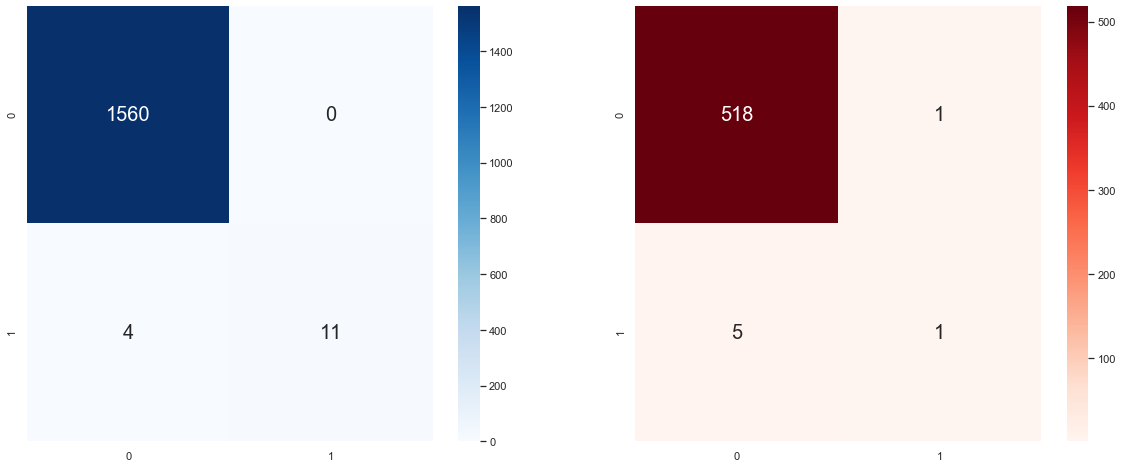

In [212]:
acurracy_RF = accuracy_score(y_test,y_testPred_RF)

#conf = confusion_matrix(y_test, y_testPred_RF).ravel()
#TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

#compare_awards['DGA_winner']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_RF), annot = True, cmap="Blues", annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_RF), annot = True, cmap="Reds", annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_RF))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_RF))

In [213]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_RF, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_RF, digits=3))

[Train Data]
              precision    recall  f1-score   support

           0      0.997     1.000     0.999      1560
           1      1.000     0.733     0.846        15

    accuracy                          0.997      1575
   macro avg      0.999     0.867     0.922      1575
weighted avg      0.997     0.997     0.997      1575

----------------------------------------------------------
[Test Data]
              precision    recall  f1-score   support

           0      0.990     0.998     0.994       519
           1      0.500     0.167     0.250         6

    accuracy                          0.989       525
   macro avg      0.745     0.582     0.622       525
weighted avg      0.985     0.989     0.986       525



Random Forest: ROC AUC=0.582


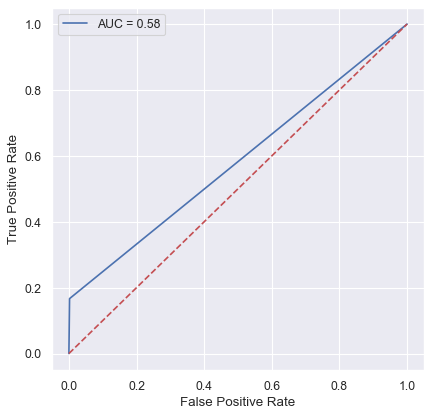

In [214]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')

RF_auc = roc_auc_score(y_test, y_testPred_RF)

# summarize scores
print('Random Forest: ROC AUC=%.3f' % (RF_auc))

# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_testPred_RF)

# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, 'b',label='AUC = %0.2f'% RF_auc)
pyplot.plot([0,1],[0,1],'r--')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Linear SVC

# Category 1 - Film Elements

In [ ]:
compare_category = dict()

In [ ]:
#prep the x variables and y variables
X_set_film_elements = data[feat_film_elements]
y_set_film_elements = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_film_elements, y_set_film_elements, test_size = 0.25)

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(random_state=0, tol=1e-5, dual=False)

#fit data
linearSVC.fit(X_train, y_train)

#predict response
y_trainPred_linearSVC = linearSVC.predict(X_train)
y_testPred_linearSVC = linearSVC.predict(X_test)

In [ ]:
acurracy_linearSVC = accuracy_score(y_test,y_testPred_linearSVC)

conf = confusion_matrix(y_test, y_testPred_linearSVC).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category['Film Elements']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_linearSVC), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_linearSVC), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_linearSVC))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_linearSVC))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_linearSVC, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_linearSVC, digits=3))

# Category 2 - Movie Critics Rating

In [ ]:
#prep the x variables and y variables
X_set_movie_critics = data[feat_movie_critics]
y_set_movie_critics = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_movie_critics, y_set_movie_critics, test_size = 0.25)

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(random_state=0, tol=1e-5, dual=False)

#fit data
linearSVC.fit(X_train, y_train)

#predict response
y_trainPred_linearSVC = linearSVC.predict(X_train)
y_testPred_linearSVC = linearSVC.predict(X_test)

In [ ]:
acurracy_linearSVC = accuracy_score(y_test,y_testPred_linearSVC)

conf = confusion_matrix(y_test, y_testPred_linearSVC).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category['Movie Critics Rating']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_linearSVC), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_linearSVC), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_linearSVC))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_linearSVC))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_linearSVC, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_linearSVC, digits=3))

# Category 3 - Commercial

In [ ]:
#prep the x variables and y variables
X_set_commercial = data[feat_commercial]
y_set_commercial = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_commercial, y_set_commercial, test_size = 0.25)

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(random_state=0, tol=1e-5, dual=False)

#fit data
linearSVC.fit(X_train, y_train)

#predict response
y_trainPred_linearSVC = linearSVC.predict(X_train)
y_testPred_linearSVC = linearSVC.predict(X_test)

In [ ]:
acurracy_linearSVC = accuracy_score(y_test,y_testPred_linearSVC)

conf = confusion_matrix(y_test, y_testPred_linearSVC).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category['Commercial']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_linearSVC), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_linearSVC), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_linearSVC))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_linearSVC))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_linearSVC, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_linearSVC, digits=3))

# Category 4 - Film Awards

In [ ]:
#prep the x variables and y variables
X_set_awards = data[feat_awards]
y_set_awards = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_awards, y_set_awards, test_size = 0.25)

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(random_state=0, tol=1e-5, dual=False)

#fit data
linearSVC.fit(X_train, y_train)

#predict response
y_trainPred_linearSVC = linearSVC.predict(X_train)
y_testPred_linearSVC = linearSVC.predict(X_test)

In [ ]:
acurracy_linearSVC = accuracy_score(y_test,y_testPred_linearSVC)

conf = confusion_matrix(y_test, y_testPred_linearSVC).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category['Film Awards']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_linearSVC), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_linearSVC), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_linearSVC))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", linearSVC.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_linearSVC))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_linearSVC, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_linearSVC, digits=3))

In [ ]:
sb.set(font_scale=1.7) 
fig, ax1 = plt.subplots(ncols=1, sharey=True,figsize=(22,10))
graph=pd.DataFrame(list(compare_category.items()),columns=['Features Category','True Postive Rate'])
display(graph) 
sb.pointplot(x="Features Category", y="True Postive Rate", data=graph,ax=ax1)

Just in case... We test with KNeighbors Classifier too.


---

# K-Nearest Neighbors Classifier

# Category 1 - Film Elements

In [ ]:
compare_category2 = dict()

In [ ]:
#prep the x variables and y variables
X_set_film_elements = data[feat_film_elements]
y_set_film_elements = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_film_elements, y_set_film_elements, test_size = 0.25)

In [ ]:
KNN = KNeighborsClassifier()

#fit data
KNN.fit(X_train, y_train)

#predict response
y_trainPred_KNN = KNN.predict(X_train)
y_testPred_KNN = KNN.predict(X_test)

In [ ]:
acurracy_KNN = accuracy_score(y_test,y_testPred_KNN)

conf = confusion_matrix(y_test, y_testPred_KNN).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category2['Film Elements']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_KNN), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_KNN), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_KNN))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_KNN))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_KNN, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_KNN, digits=3))

# Category 2 - Movie Critics Rating

In [ ]:
#prep the x variables and y variables
X_set_movie_critics = data[feat_movie_critics]
y_set_movie_critics = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_movie_critics, y_set_movie_critics, test_size = 0.25)

In [ ]:
KNN = KNeighborsClassifier()

#fit data
KNN.fit(X_train, y_train)

#predict response
y_trainPred_KNN = KNN.predict(X_train)
y_testPred_KNN = KNN.predict(X_test)

In [ ]:
acurracy_KNN = accuracy_score(y_test,y_testPred_KNN)

conf = confusion_matrix(y_test, y_testPred_KNN).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category2['Movie Critics Rating']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_KNN), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_KNN), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_KNN))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_KNN))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_KNN, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_KNN, digits=3))

# Category 3 - Commercial

In [ ]:
#prep the x variables and y variables
X_set_commercial = data[feat_commercial]
y_set_commercial = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_commercial, y_set_commercial, test_size = 0.25)

In [ ]:
KNN = KNeighborsClassifier()

#fit data
KNN.fit(X_train, y_train)

#predict response
y_trainPred_KNN = KNN.predict(X_train)
y_testPred_KNN = KNN.predict(X_test)

In [ ]:
acurracy_KNN = accuracy_score(y_test,y_testPred_KNN)

conf = confusion_matrix(y_test, y_testPred_KNN).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category2['Commercial']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_KNN), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_KNN), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_KNN))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_KNN))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_KNN, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_KNN, digits=3))

# Category 4 - Film Awards

In [ ]:
#prep the x variables and y variables
X_set_awards = data[feat_awards]
y_set_awards = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_awards, y_set_awards, test_size = 0.25)

In [ ]:
KNN = KNeighborsClassifier()

#fit data
KNN.fit(X_train, y_train)

#predict response
y_trainPred_KNN = KNN.predict(X_train)
y_testPred_KNN = KNN.predict(X_test)

In [ ]:
acurracy_KNN = accuracy_score(y_test,y_testPred_KNN)

conf = confusion_matrix(y_test, y_testPred_KNN).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_category2['Film Awards']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_KNN), annot = True, cmap="Blues", 
           annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_KNN), annot = True, cmap="Reds", 
           annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_KNN))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", KNN.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_KNN))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_KNN, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_KNN, digits=3))

In [ ]:
sb.set(font_scale=1.7) 
fig, ax1 = plt.subplots(ncols=1, sharey=True,figsize=(22,10))
graph=pd.DataFrame(list(compare_category2.items()),columns=['Features Category','True Postive Rate'])
display(graph) 
sb.pointplot(x="Features Category", y="True Postive Rate", data=graph,ax=ax1)

linear SVC works better than K-Nearest Neighbors... The cheat sheet is right.


<img src="img/corr.png" width="900" align="left"/>

From now onwards, we will be focusing entirely on the Film Awards category

Bad news, linear SVC and KNN classifier have no easy way to compute the feature/variable importance weightage of their algorithm. We have no choice but to dive into the details of the individual features of the Film Awards feature category, we will need to move on and to adopt an ensemble classifier. To make our life easier, we will be using the classic Random Forest Classifier...

# Random Forest Classifier 

In [ ]:
# feat. = feature
feat_awards = ['GG_drama_winner', 'GG_drama_nominee', 'GG_comedy_winner', 'GG_comedy_nominee',
               'BAFTA_winner', 'BAFTA_nominee', 'DGA_winner', 'DGA_nominee',
               'PGA_winner', 'PGA_nominee', 'CCMA_winner', 'CCMA_nominee',
               'Golden_Palm_winner', 'Golden_Palm_nominee', 'Golden_Bear_winner', 'Golden_Bear_nominee',
               'Golden_Lion_winner', 'Golden_Lion_nominee', 'PCA_winner', 'PCA_nominee',
               'NYFCC_winner', 'NYFCC_nominee', 'OFCS_winner', 'OFCS_nominee'] #24

feat_oscar_nominee = ['Oscar_nominee']

In [ ]:
#prep the x variables and y variables
X_set_movie_critics = data[feat_awards]
y_set_movie_critics = data['Oscar_winner']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_movie_critics, y_set_movie_critics, test_size = 0.25)

In [ ]:
forest = RandomForestClassifier(
    max_depth=25,
    min_samples_split=15,
    n_estimators=1000,
    random_state=1)

my_forest = forest.fit(X_train, y_train)

In [ ]:
forest_importances = pd.DataFrame(my_forest.feature_importances_.round(3), feat_awards, columns=["Importances Weightage"])

print(forest_importances)
print('Score', my_forest.score(X_train, y_train))

Great! It aligns with the conclusions drawn from EDA. DGA_winner is deemed as the most important feature, followed by CCMA_winner and PGA_winner

Now we will be testing just 3 of them using Random Forest Classifier.

# DGA_winner


In [ ]:
compare_awards = dict()

In [ ]:
#prep the x variables and y variables
y_set_dgaw = data['Oscar_winner']
X_set_dgaw = pd.DataFrame(data['DGA_winner'])
    
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_dgaw, y_set_dgaw, test_size = 0.25)

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, max_depth = 8)

#fit data
RF.fit(X_train, y_train)

#predict response
y_trainPred_RF = RF.predict(X_train)
y_testPred_RF = RF.predict(X_test)

In [ ]:
acurracy_RF = accuracy_score(y_test,y_testPred_RF)

conf = confusion_matrix(y_test, y_testPred_RF).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_awards['DGA_winner']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_RF), annot = True, cmap="Blues", annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_RF), annot = True, cmap="Reds", annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_RF))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_RF))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_RF, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_RF, digits=3))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')

RF_auc = roc_auc_score(y_test, y_testPred_RF)

# summarize scores
print('Random Forest: ROC AUC=%.3f' % (RF_auc))

# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_testPred_RF)

# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, 'b',label='AUC = %0.2f'% RF_auc)
pyplot.plot([0,1],[0,1],'r--')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = y_test.tolist()
predicted_values = y_testPred_RF.tolist()

test_prediction = [1 if pred=="Oscar_winner" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="Oscar_winner" else 0 for pred in predicted_values]

fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = testset.label.tolist()
predicted_values = predicted_values_NB.tolist()
test_prediction = [1 if pred=="spam" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="spam" else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

# CCMA_winner

In [ ]:
#prep the x variables and y variables
y_set_ccma = pd.DataFrame(data['Oscar_winner'])
X_set_ccma = pd.DataFrame(data['CCMA_winner'])
    
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_ccma, y_set_ccma, test_size = 0.25)

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, max_depth = 8)

#fit data
RF.fit(X_train, y_train)

#predict response
y_trainPred_RF = RF.predict(X_train)
y_testPred_RF = RF.predict(X_test)

In [ ]:
acurracy_RF = accuracy_score(y_test,y_testPred_RF)

conf = confusion_matrix(y_test, y_testPred_RF).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_awards['CCMA_winner']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_RF), annot = True, cmap="Blues", annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_RF), annot = True, cmap="Reds", annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_RF))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_RF))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_RF, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_RF, digits=3))

# PGA_winner

In [ ]:
#prep the x variables and y variables
y_set_pgaw = data['Oscar_winner']
X_set_pgaw = pd.DataFrame(data['PGA_winner'])
    
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_set_pgaw, y_set_pgaw, test_size = 0.25)

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, max_depth = 8)

#fit data
RF.fit(X_train, y_train)

#predict response
y_trainPred_RF = RF.predict(X_train)
y_testPred_RF = RF.predict(X_test)

In [ ]:
acurracy_RF = accuracy_score(y_test,y_testPred_RF)

conf = confusion_matrix(y_test, y_testPred_RF).ravel()
TPR = ((conf[3]/(conf[2]+conf[3]))*100).round(1)

compare_awards['PGA_winner']=TPR

#visualise the result
f,axes = plt.subplots(1,2,figsize = (20,8))
sb.heatmap(confusion_matrix(y_train, y_trainPred_RF), annot = True, cmap="Blues", annot_kws={"size":20}, ax = axes[0], fmt='.0f')
sb.heatmap(confusion_matrix(y_test, y_testPred_RF), annot = True, cmap="Reds", annot_kws={"size":20}, ax = axes[1], fmt = '.0f')

print(color.BOLD + '\t [Train Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_train, y_train).round(3))
get_rate(confusion_matrix(y_train, y_trainPred_RF))

print("-----------------------------------")

print(color.BOLD + '\t  [Test Data] ' + color.END)
print()
print("Classification Accuracy  : ", RF.score(X_test, y_test).round(3))
get_rate(confusion_matrix(y_test, y_testPred_RF))

In [ ]:
print(color.BOLD + '[Train Data]' + color.END)
print(classification_report(y_train,y_trainPred_RF, digits=3))
print("----------------------------------------------------------")
print(color.BOLD + '[Test Data]' + color.END)
print(classification_report(y_test,y_testPred_RF, digits=3))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = y_test.tolist()
predicted_values = y_testPred_RF.tolist()

test_prediction = [1 if pred=="Oscar_winner" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="Oscar_winner" else 0 for pred in predicted_values]

fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

In [ ]:
sb.set(font_scale=1.7) 
fig, ax1 = plt.subplots(ncols=1, sharey=True,figsize=(22,10))
graph=pd.DataFrame(list(compare_awards.items()),columns=['Features Category','True Postive Rate'])
display(graph) 
sb.pointplot(x="Features Category", y="True Postive Rate", data=graph,ax=ax1)

Apparently the results align with the feature importances 

use nominees to predict nominees?